In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#import openpyxl
customer_base = pd.read_excel('231013_Customer_Base.xlsx')
fraud_cases = pd.read_excel('231013_Fraud_Cases.xlsx')
transactions_input = pd.read_excel('231013_Transactions_Input.xlsx')

In [6]:
customer_base.head()

,customer_id,home_bank,customer_prob
0,10298,bank_E,0.49
1,14507,bank_E,0.35
2,14558,bank_E,0.45
3,13453,bank_E,0.63
4,19629,bank_D,0.79


In [7]:
fraud_cases.head()

,transaction_id,is_scam_transaction,fraud_type,case_id
0,187,1,AdvanceFee,5415844
1,247,1,Impersonation,4280670
2,818,1,Impersonation,6956462
3,891,1,Purchase,2702984
4,1142,1,Purchase,3493741


In [8]:
transactions_input.head()

,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority
0,1,Salary Deposit - XYZ Corporation,11474.33021,Income,2023-10-01,October,17699,income,paid_in,bank_A,bank_A,NaN,NaN,3
1,2,Online Retailer - Electronics Purchase,199.99000,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3
2,3,Utilities Payment - Internet Service,60.00000,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1
3,4,Rent Payment,1500.00000,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3
4,5,Paycheck Deposit - Company Name,10480.68449,Income,2023-10-01,October,14507,income,paid_in,bank_E,bank_D,NaN,NaN,3


In [18]:
df = pd.merge(transactions_input,fraud_cases,how='left',on='transaction_id')
df2 = pd.merge(df,customer_base,how='left',on='customer_id')
df2['total_prob'] = df2['customer_prob'] * df2['description_prob'] * df2['transac_prob']
df2 = df2[df2['In_or_Out']=='paid_out']
df2['scam'] = 'NO'
df2.loc[df2['is_scam_transaction'] == 1, 'scam'] = 'YES'
df2.head()

,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,...,transac_prob,description_prob,priority,is_scam_transaction,fraud_type,case_id,home_bank,customer_prob,total_prob,scam
1,2,Online Retailer - Electronics Purchase,199.99,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,...,0.78,0.25,3,NaN,NaN,NaN,bank_E,0.49,0.095550,NO
2,3,Utilities Payment - Internet Service,60.00,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,...,0.30,0.22,1,NaN,NaN,NaN,bank_E,0.49,0.032340,NO
3,4,Rent Payment,1500.00,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,...,0.57,0.53,3,NaN,NaN,NaN,bank_E,0.35,0.105735,NO
5,6,Online Retailer - Electronics Purchase,299.99,Online Shopping,2023-10-01,October,14507,spending,paid_out,bank_E,...,0.75,0.65,3,NaN,NaN,NaN,bank_E,0.35,0.170625,NO
6,7,Asos - Online Fashion Shopping,55.00,Shopping,2023-10-01,October,14507,spending,paid_out,bank_B,...,0.37,0.31,1,NaN,NaN,NaN,bank_E,0.35,0.040145,NO


In [19]:
max = df2[df2["is_scam_transaction"] == 1]['customer_prob'].max()
min = df2[df2["is_scam_transaction"] == 1]['customer_prob'].min()
print(f'For the positive scam cases, the minimun probability is {min} and the maximum is {max}')

For the positive scam cases, the minimun probability is 0.4 and the maximum is 0.9


In [11]:
max = df2[df2["is_scam_transaction"].isna()]['customer_prob'].max()
min = df2[df2["is_scam_transaction"].isna()]['customer_prob'].min()
print(f'For the negative scam cases, the minimun probability is {min} and the maximum is {max}')

For the negative scam cases, the minimun probability is 0.2 and the maximum is 0.9


In [12]:
df2[df2["is_scam_transaction"] == 1]['Amount'].count()

2481

In [13]:
(df2[df2["is_scam_transaction"] == 1]['Amount'].count() / df2['transaction_id'].count())*100

0.8389352521877916

In [14]:
df2[df2["is_scam_transaction"] == 1]['Amount'].sum()

253140.4

Try to make a table with clients, number of scams and not scams and compare probability 

In [20]:
client_prob = pd.pivot_table(df2,index=['customer_id','customer_prob'], values='Amount', columns='scam',aggfunc='count')
client_prob['YES'] = client_prob['YES'].fillna(0)
client_prob['total_trans'] = client_prob['YES'] + client_prob['NO']
client_prob['prob'] = round(client_prob['YES'] / client_prob['total_trans'],5)
client_prob = client_prob.sort_values(by=['prob'],ascending=False)
client_prob

,scam,NO,YES,total_trans,prob
customer_id,customer_prob,,,,
10757,0.74,579.0,50.0,629.0,0.07949
12141,0.76,583.0,50.0,633.0,0.07899
14141,0.77,581.0,49.0,630.0,0.07778
15995,0.53,586.0,49.0,635.0,0.07717
18942,0.83,589.0,49.0,638.0,0.07680
...,...,...,...,...,...
13013,0.33,579.0,0.0,579.0,0.00000
12945,0.44,579.0,0.0,579.0,0.00000
12926,0.32,581.0,0.0,581.0,0.00000


In [ ]:
df2.groupby(['customer_id']).count()

,transaction_id,description,Amount,category,date,month,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority,is_scam_transaction,fraud_type,case_id,home_bank,customer_prob,total_prob
customer_id,,,,,,,,,,,,,,,,,,,
10003,598,598,598,598,598,598,598,598,482,598,598,598,598,0,0,0,598,598,598
10025,580,580,580,580,580,580,580,580,464,580,580,580,580,0,0,0,580,580,580
10035,577,577,577,577,577,577,577,577,462,577,577,577,577,0,0,0,577,577,577
10067,584,584,584,584,584,584,584,584,469,584,584,584,584,0,0,0,584,584,584
10083,591,591,591,591,591,591,591,591,474,591,591,591,591,0,0,0,591,591,591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,590,590,590,590,590,590,590,590,476,590,590,590,590,0,0,0,590,590,590
19904,586,586,586,586,586,586,586,586,471,586,586,586,586,0,0,0,586,586,586
19926,585,585,585,585,585,585,585,585,470,585,585,585,585,0,0,0,585,585,585


In [ ]:
df3 = df2[['customer_id','transac_prob','description_prob','customer_prob','total_prob']].groupby(['customer_id']).mean()
df3

,transac_prob,description_prob,customer_prob,total_prob
customer_id,,,,
10003,0.401221,0.407224,0.46,0.074907
10025,0.402948,0.406017,0.43,0.069581
10035,0.390052,0.404055,0.40,0.063068
10067,0.407414,0.393527,0.60,0.096945
10083,0.410220,0.408832,0.40,0.066522
...,...,...,...,...
19900,0.398407,0.405373,0.33,0.053989
19904,0.405700,0.393396,0.31,0.048586
19926,0.411111,0.396479,0.54,0.088010


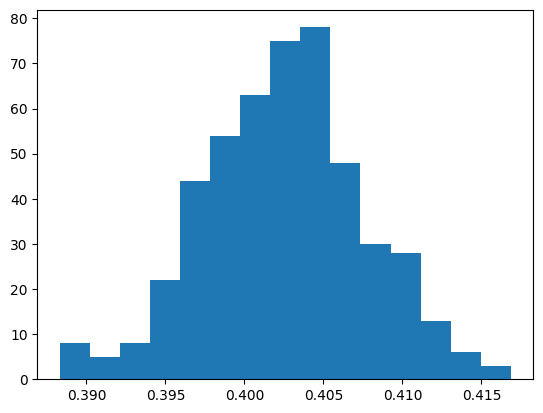

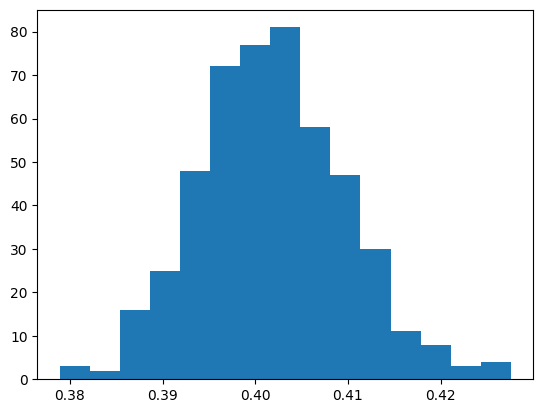

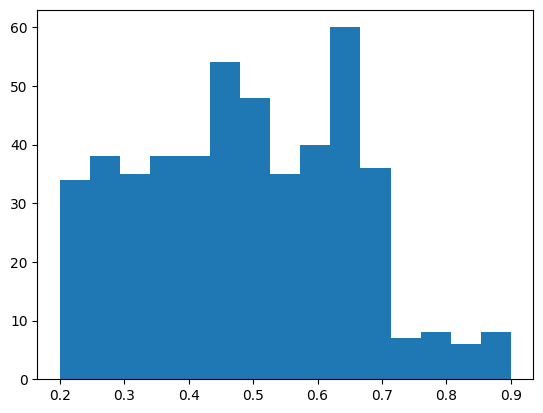

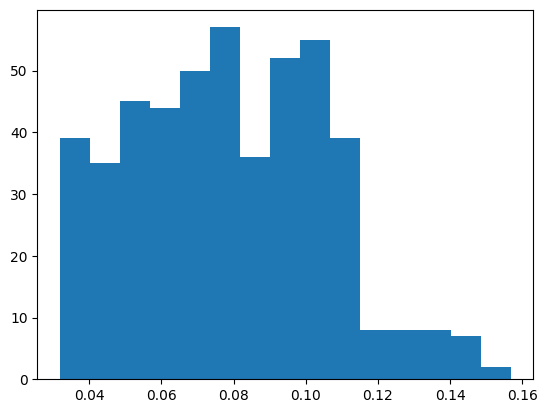

In [ ]:
list = [df3['transac_prob'],df3['description_prob'],df3['customer_prob'],df3['total_prob']]
for y in list:
    plt.hist(y,bins=15)
    plt.show()